
<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:##8ca7be;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Elad Leibovitz - 031820459</h1>
    <h2 style="text-align:center;font-weight: bold;">ML- Excercise 3</h2>

</div>

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">1. Load The Data</h1>

</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import itertools
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer. For removing stem words
import unicodedata                                      # Removing accented characters
from nltk.stem import LancasterStemmer
from IPython.display import display
import io
import re
import os
import string
import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm

pip install tensorflow


 # Implement and train word2vec skipgram model using the functional API of tf.keras

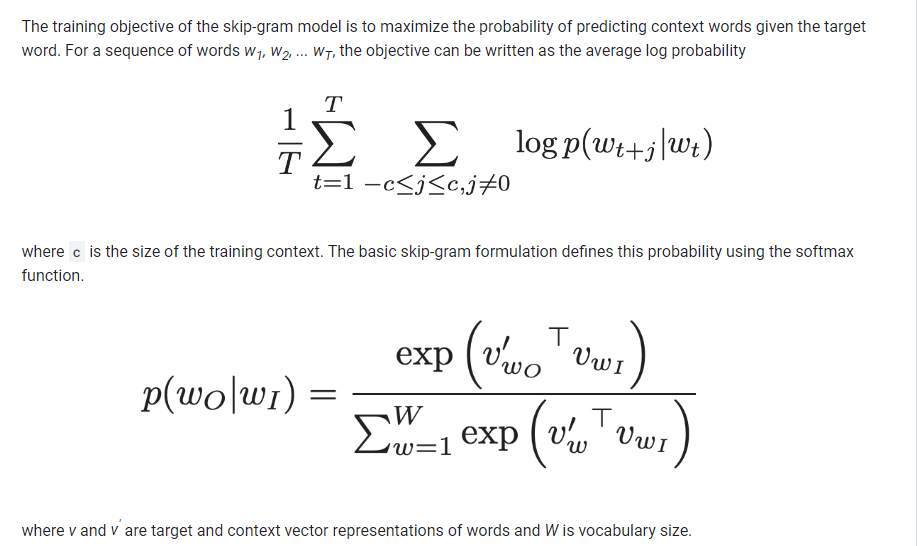

In [2]:
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

In [3]:
from scipy import sparse

# read the txt file

sample = pd.read_csv('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/reviews_data.txt', sep='\t', header=None, engine='python') #-----Reading text data

To create a sequence of words from each review, where each word is represented by its corresponding index in the vocabulary, you can use the Tokenizer class from the tf.keras.preprocessing.text module. Here's an example code snippet:

In [5]:
# Create pandas df form the file

df2 = pd.DataFrame(sample[0])

In [6]:
# read first rows

df2.head()

,0
0,oct nice trendy hotel location not too bad sta...
1,sep great budget hotel stayed two nights at al...
2,aug excellent value location not big problem w...
3,jul stylish clean reasonable value poor locati...
4,may remote but excellent value for money staye...


In [7]:
# Replace columne name

df2.rename(columns = {0:'sentences'},inplace=True)

In [8]:
Check first row

df2['sentences'][0]

'oct nice trendy hotel location not too bad stayed in this hotel for one night as this is fairly new place some of the taxi drivers did not know where it was and or did not want to drive there once have eventually arrived at the hotel was very pleasantly surprised with the decor of the lobby ground floor area it was very stylish and modern found the reception staff geeting me with aloha bit out of place but guess they are briefed to say that to keep up the coroporate image as have starwood preferred guest member was given small gift upon check in it was only couple of fridge magnets in gift box but nevertheless nice gesture my room was nice and roomy there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by bliss the location is not great it is at the last metro stop and you then need to take taxi but if you are not planning on going to see the historic sites in beijing then you will be ok chose to have some breakfast in the

In [9]:
len(df2['sentences'])

255363

In [13]:
import re
from nltk.corpus import stopwords
from collections import Counter

# Remove stop words
english_stopwords = stopwords.words('english')
new_token1 = []
list_of_strings = []
special_token = "<UNK>" # Replace with your desired special token
for i in range(len(df2['sentences'])):
    new_token1.append([])
    list_of_strings.append([])
    tokens_wo_stopwords1 = [word if word.lower() not in english_stopwords else special_token for word in df2['sentences'][i].split()]
    #print(tokens_wo_stopwords1)
    new_token1[i] = tokens_wo_stopwords1  # Remove the inner list here
    #print(new_token1[i])
    list_of_strings[i].append(' '.join(new_token1[i]))  # Join the tokens into a string
    #print(list_of_strings[i])


In [14]:
# Create new df with special token

df_without_stopwords = pd.DataFrame(list_of_strings)

In [15]:
df_without_stopwords.head()

,0
0,oct nice trendy hotel location <UNK> <UNK> bad...
1,sep great budget hotel stayed two nights <UNK>...
2,aug excellent value location <UNK> big problem...
3,jul stylish clean reasonable value poor locati...
4,may remote <UNK> excellent value <UNK> money s...


In [16]:
len(df_without_stopwords)

255363

In [17]:
df_without_stopwords.rename(columns = {0:'sentences'},inplace=True)

In [18]:
import pandas as pd
import langdetect

# Remove rows with less than two words and non-English language
df_without_stopwords1 = df_without_stopwords[df_without_stopwords['sentences'].apply(lambda x: len(x.split()) >= 2)]
df_without_stopwords = df_without_stopwords1[df_without_stopwords1['sentences'].map(lambda x: x.isascii())]
df_without_stopwords = df_without_stopwords.reset_index()

In [19]:
len(df_without_stopwords)

252953

In [20]:
df_without_stopwords.to_csv('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/df_without_stopwords.csv')

In [21]:
df_without_stopwords.head(10)

,index,sentences
0,0,oct nice trendy hotel location <UNK> <UNK> bad...
1,1,sep great budget hotel stayed two nights <UNK>...
2,2,aug excellent value location <UNK> big problem...
3,3,jul stylish clean reasonable value poor locati...
4,4,may remote <UNK> excellent value <UNK> money s...
5,5,dec good value <UNK> <UNK> downtown <UNK> hote...
6,7,nov great room layout service value would defi...
7,8,nov quality hotel <UNK> quality service <UNK> ...
8,9,oct clean rooms good location poor service che...
9,10,sep amazing find <UNK> group <UNK> wants <UNK>...


In [22]:
len(df_without_stopwords['sentences'][0].split())

293

### Create Vocab

In [23]:
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for i in range(len(df_without_stopwords)):
    for token in df_without_stopwords.sentences[i].split():
        #print(token)
        if str(token) not in vocab:
            vocab[str(token)] = index
            #print(vocab)
            index += 1
        
vocab_size = len(vocab)



In [24]:
# Save the vocab

import pickle

with open('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)




### inverse_vocab

In [25]:
inverse_vocab = {index : token for token , index in vocab.items()}

In [26]:
with open('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/inverse_vocab.pkl', 'wb') as f:
    pickle.dump(inverse_vocab, f)


In [27]:
# Changing to tf dataset

text_ds = tf.data.TextLineDataset('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/df_without_stopwords.csv').filter(lambda x: tf.cast(tf.strings.length(x), bool))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [28]:
text_ds

<FilterDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [29]:
# Define the vocabulary size and the number of words in a sequence.
vocab_size = vocab_size
sequence_length = 75

# Use the `TextVectorization` layer to normalize, split, and map strings to
# integers. Set the `output_sequence_length` length to pad all samples to the
# same length.
vectorize_layer = layers.TextVectorization(
    #standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

In [30]:
#Call TextVectorization.adapt on the text dataset to create vocabulary.

vectorize_layer.adapt(text_ds.batch(1024))

In [31]:
## Save the created vocabulary for reference

inverse_vocab = vectorize_layer.get_vocabulary()

In [32]:
# Vectorize the data in text_ds

text_vector_ds = text_ds.batch(1024).prefetch(AUTOTUNE).map(vectorize_layer).unbatch()

In [33]:
sequences = list(text_vector_ds.as_numpy_iterator())
print(len(sequences))

252954


In [34]:
# Generates skip-gram pairs with negative sampling for a list of sequences
# (int-encoded sentences) based on window size, number of negative samples
# and vocabulary size.
def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
    targets, contexts, labels = [], [], [] # Elements of each training example are appended to these lists.

    # Build the sampling table for `vocab_size` tokens.
    sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)

    # Iterate over all sequences (sentences) in the dataset.
    for sequence in tqdm(sequences):
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
            sequence,
            vocabulary_size=vocab_size,
            sampling_table=sampling_table,
            window_size=window_size,
            negative_samples=0)  # Generate positive skip-gram pairs for a sequence (sentence).

        # Iterate over each positive skip-gram pair to produce training examples
        # with a positive context word and negative samples.
        for target_word, context_word in positive_skip_grams:
            context_class = tf.expand_dims(tf.constant([context_word], dtype="int64"), 1)
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
                true_classes=context_class,
                num_true=1,
                num_sampled=num_ns,
                unique=True,
                range_max=vocab_size,
                seed=seed,
                name="negative_sampling")
 
            # Build context and label vectors (for one target word)
            context = tf.concat([tf.squeeze(context_class,1), negative_sampling_candidates], 0)
            label = tf.constant([1] + [0]*num_ns, dtype="int64")

            # Append each element from the training example to global lists.
            targets.append(target_word)
            contexts.append(context)
            labels.append(label)

    return targets, contexts, labels


In [35]:

#Generate training examples from sequences

targets, contexts, labels = generate_training_data(
    sequences=sequences,
    window_size=3,
    num_ns=3,
    vocab_size=vocab_size,
    seed=SEED)

targets = np.array(targets)
contexts = np.array(contexts)
labels = np.array(labels)

print('\n')
print(f"targets.shape: {targets.shape}")
print(f"contexts.shape: {contexts.shape}")
print(f"labels.shape: {labels.shape}")

100%|█████████████████████████████████████████████████████████████████████████| 252954/252954 [33:14<00:00, 126.83it/s]




targets.shape: (10191563,)
contexts.shape: (10191563, 4)
labels.shape: (10191563, 4)


In [36]:
#Configure the dataset for performance

BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(dataset)

<BatchDataset element_spec=((TensorSpec(shape=(1024,), dtype=tf.int64, name=None), TensorSpec(shape=(1024, 4), dtype=tf.int64, name=None)), TensorSpec(shape=(1024, 4), dtype=tf.int64, name=None))>


In [37]:
#Apply Dataset.cache and Dataset.prefetch to improve performance:

dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(dataset)

<PrefetchDataset element_spec=((TensorSpec(shape=(1024,), dtype=tf.int64, name=None), TensorSpec(shape=(1024, 4), dtype=tf.int64, name=None)), TensorSpec(shape=(1024, 4), dtype=tf.int64, name=None))>



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Model and training</h1>

</div>

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

def word2vec(vocab_size, embedding_dim):
    target_input = layers.Input(shape=(1,), name="w2v_input")
    context_input = layers.Input(shape=(4,), name="context_input")
    
    target_embedding = layers.Embedding(vocab_size,
                                        embedding_dim,
                                        input_length=1,
                                        name="w2v_embedding")(target_input)
    
    context_embedding = layers.Embedding(vocab_size,
                                         embedding_dim,
                                         input_length=4)(context_input)
    
    word_emb = tf.squeeze(target_embedding, axis=1)
    context_emb = context_embedding
    
    dots = tf.einsum('be,bce->bc', word_emb, context_emb)
    
    model = tf.keras.Model(inputs=[target_input, context_input], outputs=dots)
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
    return model




In [39]:
#Define loss function and compile model

def custom_loss(x_logit, y_true):
      return tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=y_true)

In [40]:
# Running the model

embedding_dim = 100
word2vec_model = word2vec(len(inverse_vocab), embedding_dim)


In [41]:
# define a callback to log training statistics for TensorBoard:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/logs")

In [42]:
# Train the model on the dataset for some number of epochs:

word2vec_model.fit(dataset, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
9952/9952 [==============================] - 3556s 357ms/step - loss: 0.6885 - accuracy: 0.7510
Epoch 2/10
9952/9952 [==============================] - 3521s 354ms/step - loss: 0.5504 - accuracy: 0.8067
Epoch 3/10
9952/9952 [==============================] - 3510s 353ms/step - loss: 0.4938 - accuracy: 0.8295
Epoch 4/10
9952/9952 [==============================] - 3506s 352ms/step - loss: 0.4541 - accuracy: 0.8444
Epoch 5/10
9952/9952 [==============================] - 3502s 352ms/step - loss: 0.4245 - accuracy: 0.8555
Epoch 6/10
9952/9952 [==============================] - 3560s 358ms/step - loss: 0.4022 - accuracy: 0.8638
Epoch 7/10
9952/9952 [==============================] - 3641s 366ms/step - loss: 0.3852 - accuracy: 0.8699
Epoch 8/10
9952/9952 [==============================] - 3767s 379ms/step - loss: 0.3721 - accuracy: 0.8746
Epoch 9/10
9952/9952 [==============================] - 3777s 380ms/step - loss: 0.3618 - accuracy: 0.8784
Epoch 10/10
9952/9952 [==============

In [43]:
weights = word2vec_model.get_weights()[0]
np.save("C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/word2vec_weights.npy", weights)





<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Embeddings- 2D</h1>

</div>

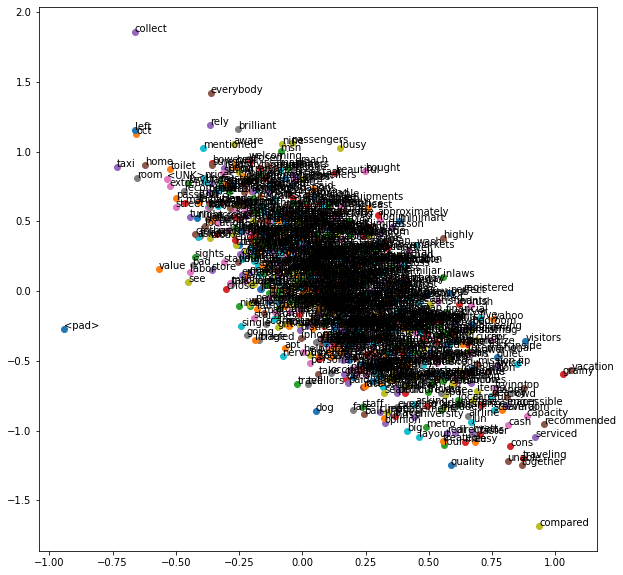

In [75]:
from sklearn.decomposition import PCA

# Get the embeddings
embeddings = weights

# Use t-SNE to project the embeddings into 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)


# checking embedded for first 1000 words
words_of_interest = list(vocab.keys())[:1000]


# Plot the embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(words_of_interest):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.show()

i : 0 word:  coffee embeddings_2d[i, 0] :  -0.9428479 embeddings_2d[i, 1] :  -0.27380043
i : 1 word:  room embeddings_2d[i, 0] :  -0.65713316 embeddings_2d[i, 1] :  1.125899
i : 2 word:  metro embeddings_2d[i, 0] :  -0.2508971 embeddings_2d[i, 1] :  -0.103898615
i : 3 word:  taxi embeddings_2d[i, 0] :  -0.31708145 embeddings_2d[i, 1] :  0.64235973
i : 4 word:  pool embeddings_2d[i, 0] :  0.07490393 embeddings_2d[i, 1] :  -0.34735477
i : 5 word:  sports embeddings_2d[i, 0] :  -0.3860574 embeddings_2d[i, 1] :  0.46777207
i : 6 word:  beds embeddings_2d[i, 0] :  -0.53556025 embeddings_2d[i, 1] :  0.8071786
i : 7 word:  historic embeddings_2d[i, 0] :  -0.43427745 embeddings_2d[i, 1] :  0.18632181
i : 8 word:  sites embeddings_2d[i, 0] :  -0.03529993 embeddings_2d[i, 1] :  -0.0992322
i : 9 word:  breakfast embeddings_2d[i, 0] :  -0.051023927 embeddings_2d[i, 1] :  0.15315707
i : 10 word:  hotel embeddings_2d[i, 0] :  -0.41806602 embeddings_2d[i, 1] :  0.52496254
i : 11 word:  trendy embeddi

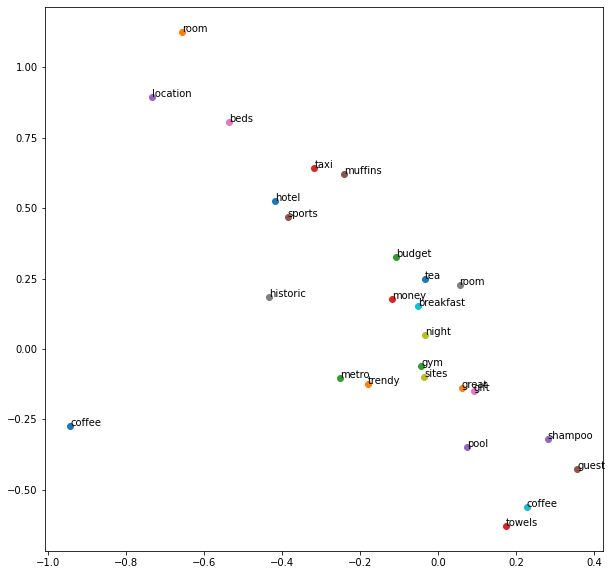

In [44]:
from sklearn.decomposition import PCA

# Get the embeddings
embeddings = weights

# Use t-SNE to project the embeddings into 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# checking some word of interests

words_of_interest = [
  'coffee',
    'room',
  'metro',
  'taxi',
  'pool',
  'sports',
  'beds',
  'historic',
  'sites',
  'breakfast',
  'hotel',
  'trendy',
  'gym',
 'money','location', 'guest', 'gift', 'room','night','coffee','tea','great','budget','towels','shampoo','muffins']



#words_of_interest = df_without_stopwords['sentences'][0].split()[50:70]
  
# Plot the embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(words_of_interest):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    print("i :" ,i ,"word: ",word, "embeddings_2d[i, 0] : " ,embeddings_2d[i, 0] , 'embeddings_2d[i, 1] : ',embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.show()




<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Embeddings- 3D</h1>

</div>

i : 0 word:  coffee embeddings_3d[i, 0] :  -0.9428278 embeddings_3d[i, 1] :  -0.2737811 embeddings_3d[i, 2] :  0.015533913
i : 1 word:  room embeddings_3d[i, 0] :  -0.65713334 embeddings_3d[i, 1] :  1.1259356 embeddings_3d[i, 2] :  -0.84801537
i : 2 word:  metro embeddings_3d[i, 0] :  -0.250897 embeddings_3d[i, 1] :  -0.10391098 embeddings_3d[i, 2] :  0.057826318
i : 3 word:  taxi embeddings_3d[i, 0] :  -0.3170817 embeddings_3d[i, 1] :  0.6423101 embeddings_3d[i, 2] :  -0.14429006
i : 4 word:  pool embeddings_3d[i, 0] :  0.07490402 embeddings_3d[i, 1] :  -0.34738338 embeddings_3d[i, 2] :  -0.20870464
i : 5 word:  sports embeddings_3d[i, 0] :  -0.3860576 embeddings_3d[i, 1] :  0.46781063 embeddings_3d[i, 2] :  -0.29659766
i : 6 word:  beds embeddings_3d[i, 0] :  -0.5355602 embeddings_3d[i, 1] :  0.80722964 embeddings_3d[i, 2] :  -0.2418004
i : 7 word:  historic embeddings_3d[i, 0] :  -0.43427765 embeddings_3d[i, 1] :  0.18640378 embeddings_3d[i, 2] :  -0.38336828
i : 8 word:  sites embe

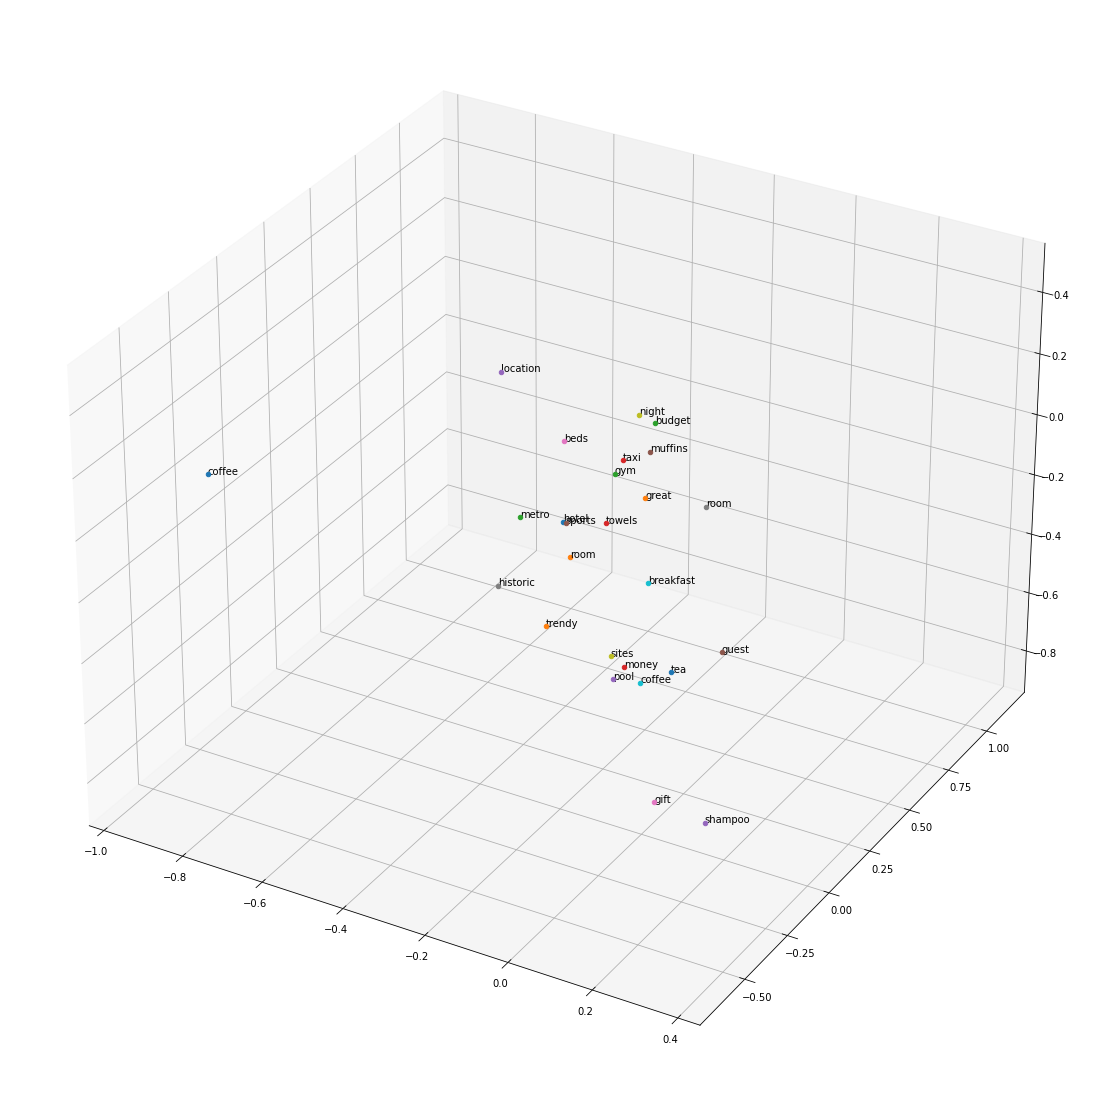

In [45]:
# Get the embeddings
embeddings = weights

# Use t-SNE to project the embeddings into 3D
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)





words_of_interest = [
  'coffee',
    'room',
  'metro',
  'taxi',
  'pool',
  'sports',
  'beds',
  'historic',
  'sites',
  'breakfast',
  'hotel',
  'trendy',
  'gym',
 'money','location', 'guest', 'gift', 'room','night','coffee','tea','great','budget','towels','shampoo','muffins']



# Plot the embeddings
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for i, word in enumerate(words_of_interest):
    ax.scatter(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2])
    print("i :" ,i ,"word: ",word, "embeddings_3d[i, 0] : " ,embeddings_3d[i, 0] , 'embeddings_3d[i, 1] : ',embeddings_3d[i, 1], 'embeddings_3d[i, 2] : ',embeddings_3d[i, 2])
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], word)
plt.show()





<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Find Most Similar Function</h1>

</div>

In [46]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# need to upload attached files: 'vocab' , 'inverse_vocab' ,'word2vec_weights' )

with open('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/vocab.pkl', 'rb') as f:
    word_index_loaded = pickle.load(f)

with open('C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/inverse_vocab.pkl', 'rb') as f:
    index_word_loaded = pickle.load(f)
    
weights = np.load("C:/Users/Eladl/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/word2vec_weights.npy")

def find_most_similar(word,weights,  k=10):
    # Get the embedding vector for the word
    word_vector = weights[word_index_loaded[word]]
    
    # Compute cosine similarity between the word vector and all other word vectors
    similarities = cosine_similarity(word_vector.reshape(1, -1), weights)[0]
    
    # Get the indices of the n most similar words
    closest_indices = np.argsort(similarities)[::-1][:k+1]
    closest_indices = [i for i in closest_indices if i != word_index_loaded[word]]
    
    # Get the words and their similarity scores
    closest_words = [index_word_loaded[i] for i in closest_indices]
    similarity_scores = similarities[closest_indices]
    
    return list(zip(closest_words, similarity_scores))



In [76]:


similar_words = find_most_similar("hotel",weights ,k =20)
print(similar_words)


[('fairly', 0.6384283), ('stne', 0.5669687), ('lurkers', 0.5570494), ('heraldsquare', 0.555406), ('teartments', 0.5473501), ('thedrake', 0.5466912), ('roomchange', 0.5462411), ('pesadilla', 0.5383371), ('upsholsery', 0.5382172), ('wests', 0.5374979), ('awell', 0.5363974), ('conduced', 0.53552973), ('cooles', 0.5351234), ('hardhats', 0.53391993), ('itthere', 0.53357947), ('ctwo', 0.53120875), ('truelly', 0.53001523), ('permanatly', 0.52765656), ('weeping', 0.52581537), ('disucss', 0.5256717)]


In [48]:


similar_words = find_most_similar("taxi",weights ,k =20 )
print(similar_words)


[('tourist', 0.66789806), ('left', 0.63274664), ('facilities', 0.6314099), ('cheapest', 0.6263885), ('currency', 0.6211382), ('need', 0.60847175), ('mooch', 0.5896703), ('thanks', 0.5805623), ('appreciated', 0.5785727), ('<UNK>', 0.53413135), ('fehgehdaboutit', 0.5337658), ('south', 0.531977), ('without', 0.52809), ('socalled', 0.5239432), ('rioamenities', 0.52204704), ('recommed', 0.520027), ('zhushikou', 0.5143839), ('grapevine', 0.51047635), ('laoshe', 0.5047519), ('clearly', 0.50441)]


In [60]:


similar_words = find_most_similar("location",weights ,k =20 )
print(similar_words)


[('across', 0.7412492), ('jan', 0.7361526), ('fully', 0.6466247), ('preferred', 0.6460107), ('bad', 0.64497125), ('felt', 0.6333152), ('sized', 0.6151075), ('large', 0.612008), ('hours', 0.58823323), ('trip', 0.5790382), ('place', 0.578368), ('upset', 0.5710784), ('hopping', 0.56988835), ('candies', 0.5646403), ('peters', 0.5604776), ('bs', 0.5521569), ('shoping', 0.5520388), ('tanie', 0.5478721), ('thefacilities', 0.54555535), ('tattos', 0.5427547)]


In [50]:


similar_words = find_most_similar("breakfast",weights ,k =20)
print(similar_words)


[('<UNK>', 0.60164565), ('casserole', 0.58163315), ('excellent', 0.5764084), ('grandsons', 0.5498885), ('tacular', 0.5474347), ('bfe', 0.5441997), ('aboslutely', 0.5399686), ('physiology', 0.53789055), ('stayt', 0.53368485), ('starlite', 0.5308162), ('diffifcult', 0.5277546), ('blockand', 0.5268156), ('cornelia', 0.5251853), ('mcdz', 0.52480316), ('agnus', 0.5239445), ('attractions', 0.5231164), ('shouold', 0.5230609), ('lastly', 0.52023983), ('aural', 0.5188304), ('japenese', 0.51818997)]


In [72]:


similar_words = find_most_similar("review",weights ,k =20)
print(similar_words)


[('pavlovas', 0.651381), ('outtages', 0.64797217), ('mission', 0.63910735), ('grainy', 0.6387019), ('nearlyall', 0.63774514), ('returining', 0.6226666), ('disapppoint', 0.62234753), ('tianemmen', 0.6213731), ('reassign', 0.62127054), ('unaccomadating', 0.618352), ('arange', 0.6171431), ('atleats', 0.61645687), ('slammed', 0.6128335), ('halls', 0.6114138), ('turndown', 0.6110099), ('norstroms', 0.60963476), ('bowls', 0.60907215), ('coordinating', 0.60629797), ('cantanoese', 0.6042851), ('lnens', 0.6037259)]


In [52]:


similar_words = find_most_similar("gym",weights ,k =20)
print(similar_words)


[('profanities', 0.5846448), ('etap', 0.5687393), ('gatwaick', 0.5674032), ('tanmarble', 0.55533487), ('decapitate', 0.55025536), ('greennness', 0.5479443), ('doulbe', 0.54769355), ('flavourless', 0.54655087), ('satisfecho', 0.54539376), ('downcast', 0.5430991), ('indecent', 0.5414515), ('visitx', 0.54107064), ('undersize', 0.5396654), ('inmpressed', 0.5392731), ('furhtermore', 0.5392445), ('forgget', 0.5364472), ('buildiing', 0.5357574), ('conditionng', 0.52957964), ('hirecar', 0.52892125), ('inactive', 0.52822554)]



<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           letter-spacing:0.5px;
           background-color:#a3be8c;
           color:Black;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">k-means - clusters of words (embeddings)</h1>

</div>


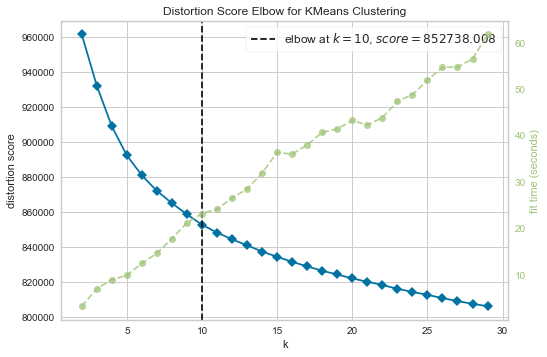

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(embeddings)        # Fit data to visualizer
visualizer.show()

### I see that cluster =10 is the best choise

In [119]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
# pca with 2 dim
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(embeddings)
 
df.shape

(143424, 2)

In [134]:

 #Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 2 4 ... 0 4 0]


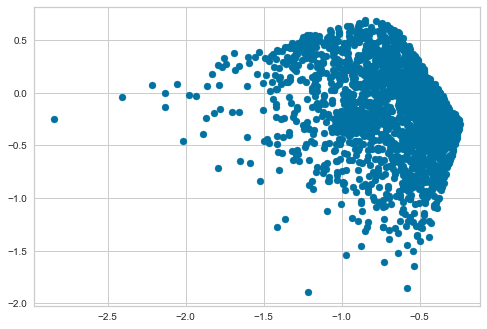

In [135]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

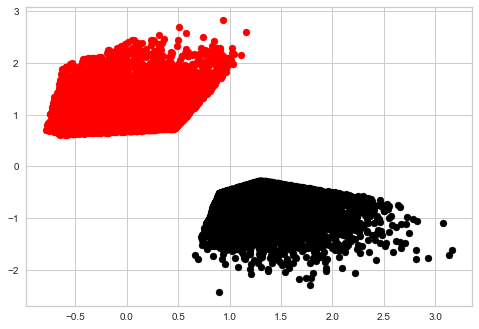

In [136]:
#filter rows of original data
filtered_label2 = df[label == 2]
 
filtered_label8 = df[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

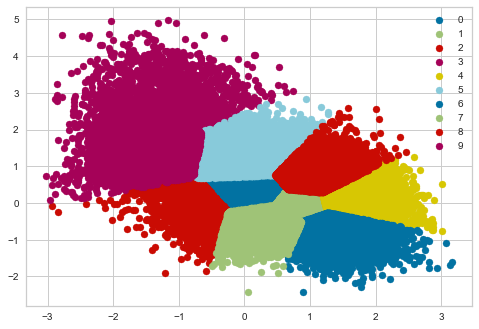

In [123]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [137]:
label

array([0, 2, 4, ..., 0, 4, 0])

### Plotting the Cluster Centroids

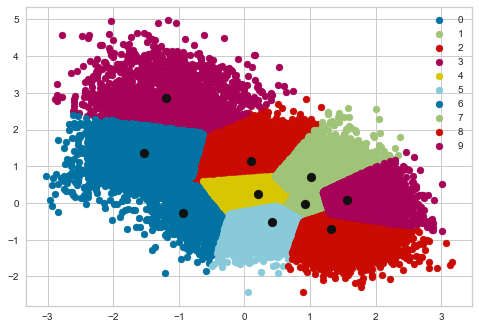

In [138]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [139]:
from sklearn.cluster import KMeans

# number of clusters
k = 10

word_clusters = {}
for i, label in enumerate(label):
    word = list(vocab)[i]
    if label not in word_clusters:
        word_clusters[label] = []
    word_clusters[label].append(word)

# display words in each cluster
for label, words in word_clusters.items():
    print(f"Cluster {label}: {words}")


Cluster 0: ['<pad>', 'see', 'value', 'labor', 'fuss', 'professionalism', 'disdainful', 'fancied', 'breakast', 'grasped', 'infallible', 'tripod', 'jingshan', 'bearly', 'isssues', 'horrendus', 'bessie', 'observe', 'terrazzo', 'mangoes', 'centuries', 'crowdy', 'hairy', 'seto', 'quotaoverall', 'ell', 'civilization', 'sneeze', 'phrasebook', 'bases', 'rfont', 'apprear', 'forgetful', 'assignments', 'wiondow', 'panes', 'baishu', 'thrid', 'reiterated', 'attack', 'taxicompany', 'ci', 'seminars', 'spider', 'columbus', 'droning', 'defense', 'prefessional', 'lakeshore', 'eased', 'prop', 'lloyd', 'dinnner', 'sooooooo', 'toting', 'shelburne', 'dripping', 'yay', 'caked', 'retains', 'mext', 'jerome', 'nj', 'irritation', 'shelling', 'blech', 'teacup', 'sloooow', 'halifax', 'patries', 'fitmess', 'ammenitie', 'jim', 'complimentay', 'defiintley', 'cleanaveda', 'mending', 'bachorette', 'dozzy', 'unstable', 'disrepair', 'mcfaddens', 'tattered', 'throuback', 'mason', 'colossal', 'commercials', 'rockford', 'lo